# Prework

possible issues with data- 
1. some crimes were never reported
2. false crimes reported (either never happened or found later in court to not have been a crime)
3. holidays effect on crime

hypotheses: days with full moons have more crime

null hypotheses: full moons have no effeect on crime rates

In [ ]:
#import kaggle       
#kaggle.api.authenticate()
#kaggle.api.dataset_download_files('API command here', path='Resources', unzip=True)

#API commands used from Kaggle:
#Boston: AnalyzeBoston/crimes-in-boston
#Baltimore: sohier/crime-in-baltimore
#Philadelphia: mchirico/philadelphiacrimedata
#Solar & Lunar: nasa/solar-eclipses
#Full Moon: lsind18/full-moon-calendar-1900-2050

In [ ]:
# #Dependencies
# import pandas as pd
# import numpy as np
# import os
# import time

# #File load
# boston = "Resources/boston_crime_data.csv"
# philadelphia = "Resources/philadelphia_crime_data.csv"
# baltimore = "Resources/balitmore_crime_data.csv"

# #Read file and store into pandas data frame
# boston_data_df = pd.read_csv(boston, sep = ',')
# philadelphia_data_df = pd.read_csv(philadelphia, sep = ',')
# baltimore_data_df = pd.read_csv(baltimore, sep = ',')


In [ ]:
#boston_data_df.head()
#baltimore_data_df.head()
#philadelphia_data_df.head()

In [ ]:
# #Sort through data to make smaller, finding only requested year
# #Philadephia
# philadelphia_data_df['Dispatch_Date']= pd.to_datetime(philadelphia_data_df['Dispatch_Date'])
# philadelphia_data_df2 = philadelphia_data_df[philadelphia_data_df['Dispatch_Date'].dt.year == 2016]
# #Also reduce column size to fit into git repository 
# philadelphia_data_df3 = philadelphia_data_df2[['Dispatch_Date', 'Text_General_Code']].copy()
# philadelphia_data_df3['Text_General_Code'].value_counts()

# #Original files too large to upload to GitHub. 
# #Isolated year 2016, selected desired columns then saved and uploaded shortened version
# philadelphia_data_df3.to_csv('Resources/philadelphia_data_df3.csv')

In [ ]:
# #Sort through data to make smaller, finding only requested year
# #Boston
# boston_data_df['OCCURRED_ON_DATE']= pd.to_datetime(boston_data_df['OCCURRED_ON_DATE'])
# boston_data_df2 = boston_data_df[boston_data_df['OCCURRED_ON_DATE'].dt.year == 2016]

# #Original files too large to upload to GitHub. 
# #Isolated year 2016 then saved and uploaded shortened version
# boston_data_df2.to_csv('Resources/boston_data_df3.csv')

In [ ]:
# #Sort through data to make smaller, finding only requested year
# #Baltimore
# baltimore_data_df['CrimeDate']= pd.to_datetime(baltimore_data_df['CrimeDate'])
# baltimore_data_df2 = baltimore_data_df[baltimore_data_df['CrimeDate'].dt.year == 2016]

# #Original files too large to upload to GitHub. 
# #Isolated year 2016 then saved and uploaded shortened version
# baltimore_data_df2.to_csv('Resources/baltimore_data_df3.csv')

#!curl

# Lunar cycle effects on three major cities in eastern North America


In [1]:
#Dependencies
import pandas as pd
import numpy as np
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
%matplotlib inline

#Load files
boston = "Resources/boston_data_df3.csv"
philadelphia = "Resources/philadelphia_data_df3.csv"
baltimore = "Resources/baltimore_data_df3.csv"
solar = "Resources/solar.csv"
lunar = "Resources/lunar.csv"
full_moon = "Resources/full_moon.csv"


#Read file and store into pandas data frame
boston_df = pd.read_csv(boston, sep = ',')
philadelphia_crime_2016 = pd.read_csv(philadelphia, sep = ',')
baltimore_df = pd.read_csv(baltimore, sep = ',')
solar_df = pd.read_csv(solar, sep = ',')
lunar_df = pd.read_csv(lunar, sep = ',')
full_moon_data_df = pd.read_csv(full_moon, sep = ',')


In [2]:
#Shorten  data frames to get just desired columns
#Boston
boston_crime_2016 = boston_df[['OCCURRED_ON_DATE','OFFENSE_CODE_GROUP' ,'OFFENSE_DESCRIPTION']].copy()
boston_crime_2016['OCCURRED_ON_DATE'] = pd.to_datetime(boston_crime_2016['OCCURRED_ON_DATE']).dt.normalize()
boston_crime_2016.rename(columns = {'OCCURRED_ON_DATE':'Crime Date', 'OFFENSE_CODE_GROUP':'Offense Description',
                                    'OFFENSE_DESCRIPTION':'Offense Specific' }, inplace = True)
boston_crime_drop = boston_crime_2016.drop('Offense Specific', 1)

#Baltimore
baltimore_crime_2016 = baltimore_df[['CrimeDate', 'Description', 'Weapon']].copy()
baltimore_crime_2016.rename(columns = {'CrimeDate':'Crime Date', 'Description':'Offense Description'}, inplace = True)
# baltimore_data_df3['Description'].value_counts()

#Philadelphia: 
# data already redcued in order to fit in git hub repository
philadelphia_crime_2016.rename(columns = {'Unnamed: 0': 'Prior Index', 'Dispatch_Date':'Crime Date', 'Text_General_Code':'Offense Description'}, inplace = True)
#del philadelphia_crime_2016['Unnamed: 0']

#Solar eclipse
#sort desired columns
solar_data_df = solar_df[['Calendar Date', 'Eclipse Time', 'Gamma', 'Eclipse Magnitude']].copy()
#sort desired year
solar_data_df['Calendar Date']= pd.to_datetime(solar_data_df['Calendar Date'], errors = 'coerce')
solar_eclipse_2016 = solar_data_df[solar_data_df['Calendar Date'].dt.year == 2016]

#Lunar eclipse
#sort desired columns
lunar_data_df = lunar_df[['Calendar Date', 'Eclipse Time', 'Gamma', 'Penumbral Eclipse Duration (m)', \
                             'Partial Eclipse Duration (m)', 'Total Eclipse Duration (m)']].copy()
#sort desired year
lunar_data_df['Calendar Date']= pd.to_datetime(lunar_data_df['Calendar Date'], errors = 'coerce')
lunar_eclipse_2016 = lunar_data_df[lunar_data_df['Calendar Date'].dt.year == 2016]

#Full Moon
#fix columns by renaming (removing space before name)
full_moon_data_df.columns = ['Day', 'Calendar Date', 'Time']

#set column date as date_time and sort to get desired year
full_moon_data_df['Calendar Date']= pd.to_datetime(full_moon_data_df['Calendar Date'])
full_moon_2016 = full_moon_data_df[full_moon_data_df['Calendar Date'].dt.year == 2016]

In [3]:
#boston_crime_2016.head()
#baltimore_crime_2016.head(20)
#philadelphia_crime_2016.head(20)
#solar_eclipse_2016.head()
#lunar_eclipse_2016.head()
#full_moon_2016

In [4]:
## Other styples of Bar Graphs

#value_count = boston_crime_feb['Crime Date'].value_counts()
#value_count = boston_crime_feb['Crime Date'].value_counts(sort=False)

#month_values = boston_crime_feb['Crime Date'].unique()
#boston_crime_feb_test = boston_crime_feb['Crime Day': ]
#day = mdates.DayLocator()

#lists = sorted(itertools.izip(*[month_values, value_count]))
#new_x, new_y = zip(*sorted(zip(month_values, value_count)))
#sns.barplot(x = month_values, y= value_count)

# x= np.arange(len(month_values))
# fig, ax = plt.subplots()
# ax.bar(month_values, value_count)
# ax.set_xticks(x)
# ax.set_xticklabels(month_values)

#boston_crime_feb_group = boston_crime_feb.groupby(['Crime Date'])
#boston_crime_feb_group.count().plot(kind='bar')

#boston_crime_feb['Crime Date'].value_counts().sort_index().plot(kind='bar')
#x_axis.format_xdata = mdates.DateFormatter('%Y-%m-%d')

In [55]:
#Boston Crime January Data
boston_crime_jan_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 1]
boston_crime_jan = boston_crime_jan_unsorted.sort_values(by="Crime Date")

#To find value for day with full moon
boston_crime_jan_24 = boston_crime_jan[boston_crime_jan['Crime Date'].dt.day == 24]

day_average = f'{((boston_crime_jan_24["Crime Date"].count()/boston_crime_jan["Crime Date"].count())*100).round(2)}%'
monthly_average = f'{int(boston_crime_jan["Crime Date"].count()/31)}'

df_total_jan = pd.DataFrame(boston_crime_jan['Crime Date'].value_counts())
df_total_jan.columns = ['Reported Crime']
df_total_jan['Rank'] = df_total_jan['Reported Crime'].rank(ascending=0)
boston_jan_max = df_total_jan['Reported Crime'].max()
boston_jan_min = df_total_jan['Reported Crime'].min()


print(f'January in Boston:')
print(f'Total number of crimes reported: {boston_crime_jan["Crime Date"].count()}')
print(f'Average number of crimes per day for whole month: {monthly_average}')
print(f'The maximum crime committed on one day: {boston_jan_max}')
print(f'The minimum crime committed on one day: {boston_jan_min}')
print(f'Total crime on full mon (Jan 24th): {boston_crime_jan_24["Crime Date"].count()}')
print(f'Percentage of monthy crime that occured on day of the full moon: {day_average}')
print(f'Rank of crime on full moon: 28/31')
df_total_jan['Reported Crime'].max()

January in Boston:
Total number of crimes reported: 7835
Average number of crimes per day for whole month: 252
The maximum crime committed on one day: 354
The minimum crime committed on one day: 184
Total crime on full mon (Jan 24th): 194
Percentage of monthy crime that occured on day of the full moon: 2.48%
Rank of crime on full moon: 28/31


354

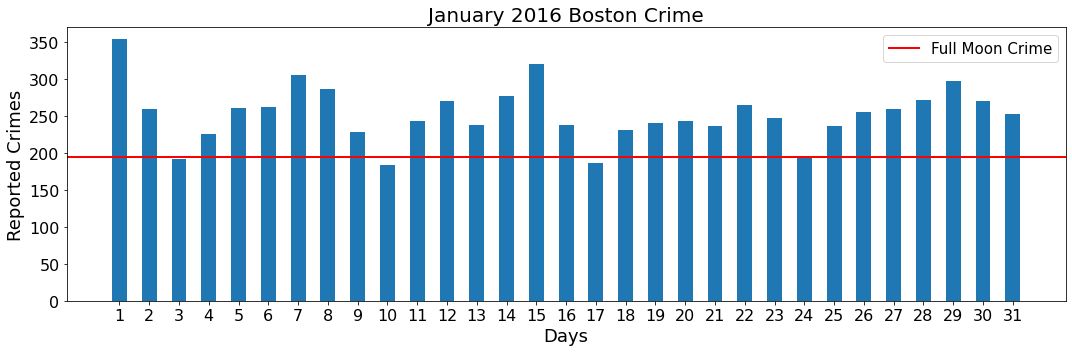

Red line is the Full Moon Crime line


In [46]:
#Boston Crime January Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_jan['Crime Date'].value_counts().sort_index()
days_month= list(range(1,32))
x=list(range(1,32))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,370)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('January 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=194, color='r', linewidth=2)

#labels = ["Full Moon Crime line"]
#handles, _ = ax.get_legend_handles_labels()

plt.legend(["Full Moon Crime"],prop={'size': 15})
fig.tight_layout()
plt.show()
print(f'Red line is the Full Moon Crime line')

In [74]:
#Boston Crime February Data
boston_crime_feb_unsorted = boston_crime_drop[boston_crime_drop['Crime Date'].dt.month == 2]
boston_crime_feb = boston_crime_feb_unsorted.sort_values(by="Crime Date")

#To find value for day of full moon
boston_crime_feb22 = boston_crime_feb[boston_crime_feb['Crime Date'].dt.day == 22]
#boston_crime_feb22.count()

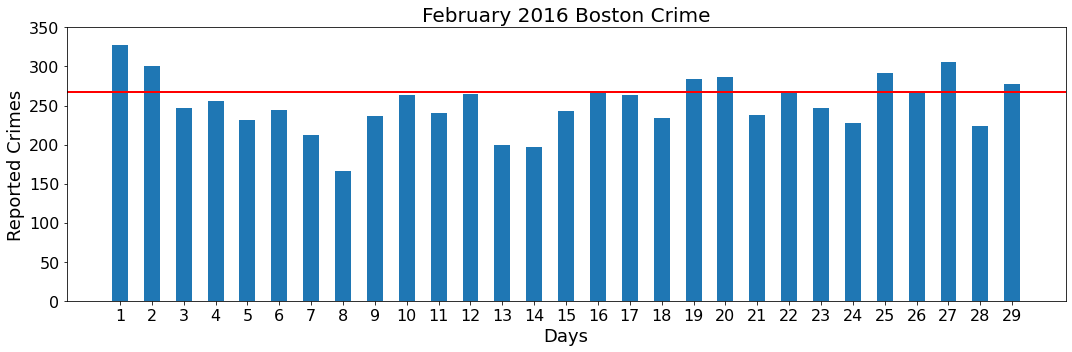

In [75]:
#Boston Crime February Plot
#Sort index by date and prepare for x-axis to be labeled by days alone
value_count = boston_crime_feb['Crime Date'].value_counts().sort_index()
days_month= list(range(1,30))
x=list(range(1,30))

#Plot parameters
fig = plt.figure(figsize = (15,5))
plt.bar(days_month, value_count, width = .5)

#Clean and Label plot
plt.xticks(x)
plt.tick_params(labelsize=16)
plt.xlabel('Days', fontsize=18)
plt.ylim(0,350)
plt.ylabel('Reported Crimes', fontsize=18)
plt.title('February 2016 Boston Crime', fontsize=20)

#add line for day of full moon
plt.axhline(y=267, color='r', linewidth=2)
fig.tight_layout()
plt.show()


In [42]:
#boston_crime_feb22['Crime Date'].value_counts()
#month_values 
#value_count
#boston_crime_feb.dtypes
#boston_crime_feb_group.count()
#days_month


In [ ]:
#look at full moon day and find percentage of crime for the month that occured on that day

#Add all full moon percentages and compare to whole year percentage

#specific type of crime that happened on the full moon nights?

#lunar/ solar days and crime